In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-education-dataset/world-education-data.csv


In [2]:
rt=pd.read_csv('/kaggle/input/world-education-dataset/world-education-data.csv')
rt.head()

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


In [5]:
rt.describe()

,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
count,5892.000000,4499.000000,1877.000000,4440.000000,3676.000000,3017.000000,5352.000000,4745.000000,4392.000000
mean,2010.921419,4.320129,79.483333,87.776740,25.344398,17.560340,101.525234,78.939810,36.533796
std,7.119808,1.736997,17.186877,17.857748,12.780357,7.465528,13.029901,28.350998,26.960123
min,1999.000000,0.242600,14.000000,14.411250,5.360520,4.979320,8.447979,3.293810,0.117370
25%,2005.000000,3.180390,65.984039,80.308426,15.888230,11.983680,97.281084,59.364799,12.605780
50%,2011.000000,4.101967,83.915154,94.604504,22.172125,16.224470,101.556335,85.707581,30.962285
75%,2017.000000,5.163850,94.215561,99.081194,32.569205,21.583330,106.822365,99.230003,57.325488
max,2023.000000,15.863470,100.000000,156.167175,100.236490,80.052320,257.434204,194.460022,166.665649


In [6]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5892 non-null   object 
 1   country_code                5892 non-null   object 
 2   year                        5892 non-null   int64  
 3   gov_exp_pct_gdp             4499 non-null   float64
 4   lit_rate_adult_pct          1877 non-null   float64
 5   pri_comp_rate_pct           4440 non-null   float64
 6   pupil_teacher_primary       3676 non-null   float64
 7   pupil_teacher_secondary     3017 non-null   float64
 8   school_enrol_primary_pct    5352 non-null   float64
 9   school_enrol_secondary_pct  4745 non-null   float64
 10  school_enrol_tertiary_pct   4392 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 506.5+ KB


In [7]:
rt.shape

(5892, 11)

In [8]:
rt.isnull().sum()

country                          0
country_code                     0
year                             0
gov_exp_pct_gdp               1393
lit_rate_adult_pct            4015
pri_comp_rate_pct             1452
pupil_teacher_primary         2216
pupil_teacher_secondary       2875
school_enrol_primary_pct       540
school_enrol_secondary_pct    1147
school_enrol_tertiary_pct     1500
dtype: int64

In [9]:
rt.duplicated().sum()

0

In [11]:
# Fill missing values for numeric columns with the median
numeric_cols = rt.select_dtypes(include=[np.number]).columns
rt[numeric_cols] = rt[numeric_cols].fillna(rt[numeric_cols].median())

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


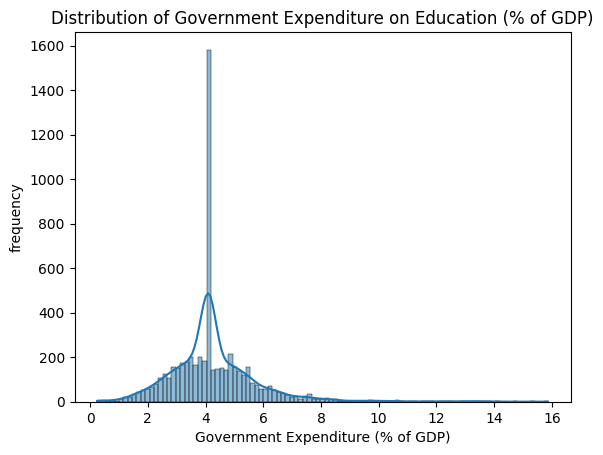

In [13]:
sns.histplot(rt['gov_exp_pct_gdp'],kde=True)
plt.xlabel('Government Expenditure (% of GDP)')
plt.ylabel('frequency')
plt.title('Distribution of Government Expenditure on Education (% of GDP)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


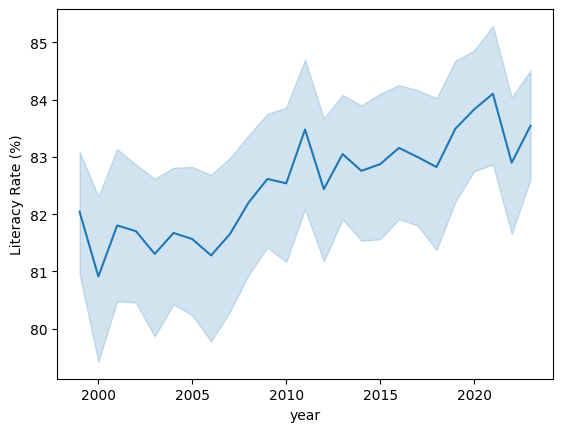

In [14]:
sns.lineplot(data=rt,y='lit_rate_adult_pct',x='year')
plt.ylabel('Literacy Rate (%)')
plt.xlabel('year')
plt.show()

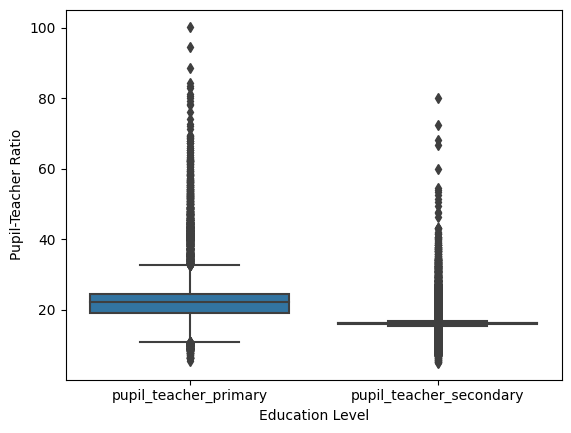

In [15]:
sns.boxplot(data=rt[['pupil_teacher_primary','pupil_teacher_secondary']])
plt.xlabel('Education Level')
plt.ylabel('Pupil-Teacher Ratio')
plt.show()

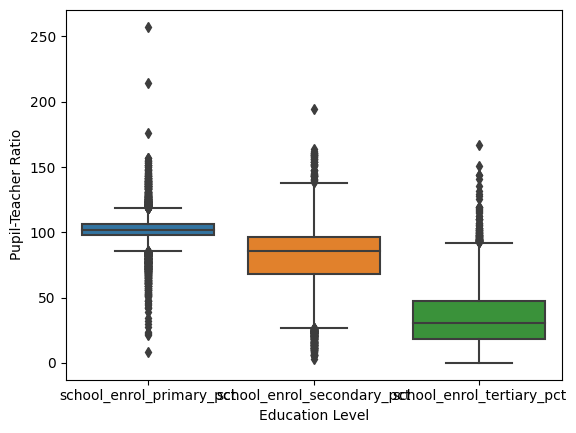

In [16]:
sns.boxplot(data=rt[['school_enrol_primary_pct','school_enrol_secondary_pct','school_enrol_tertiary_pct']])
plt.xlabel('Education Level')
plt.ylabel('Pupil-Teacher Ratio')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

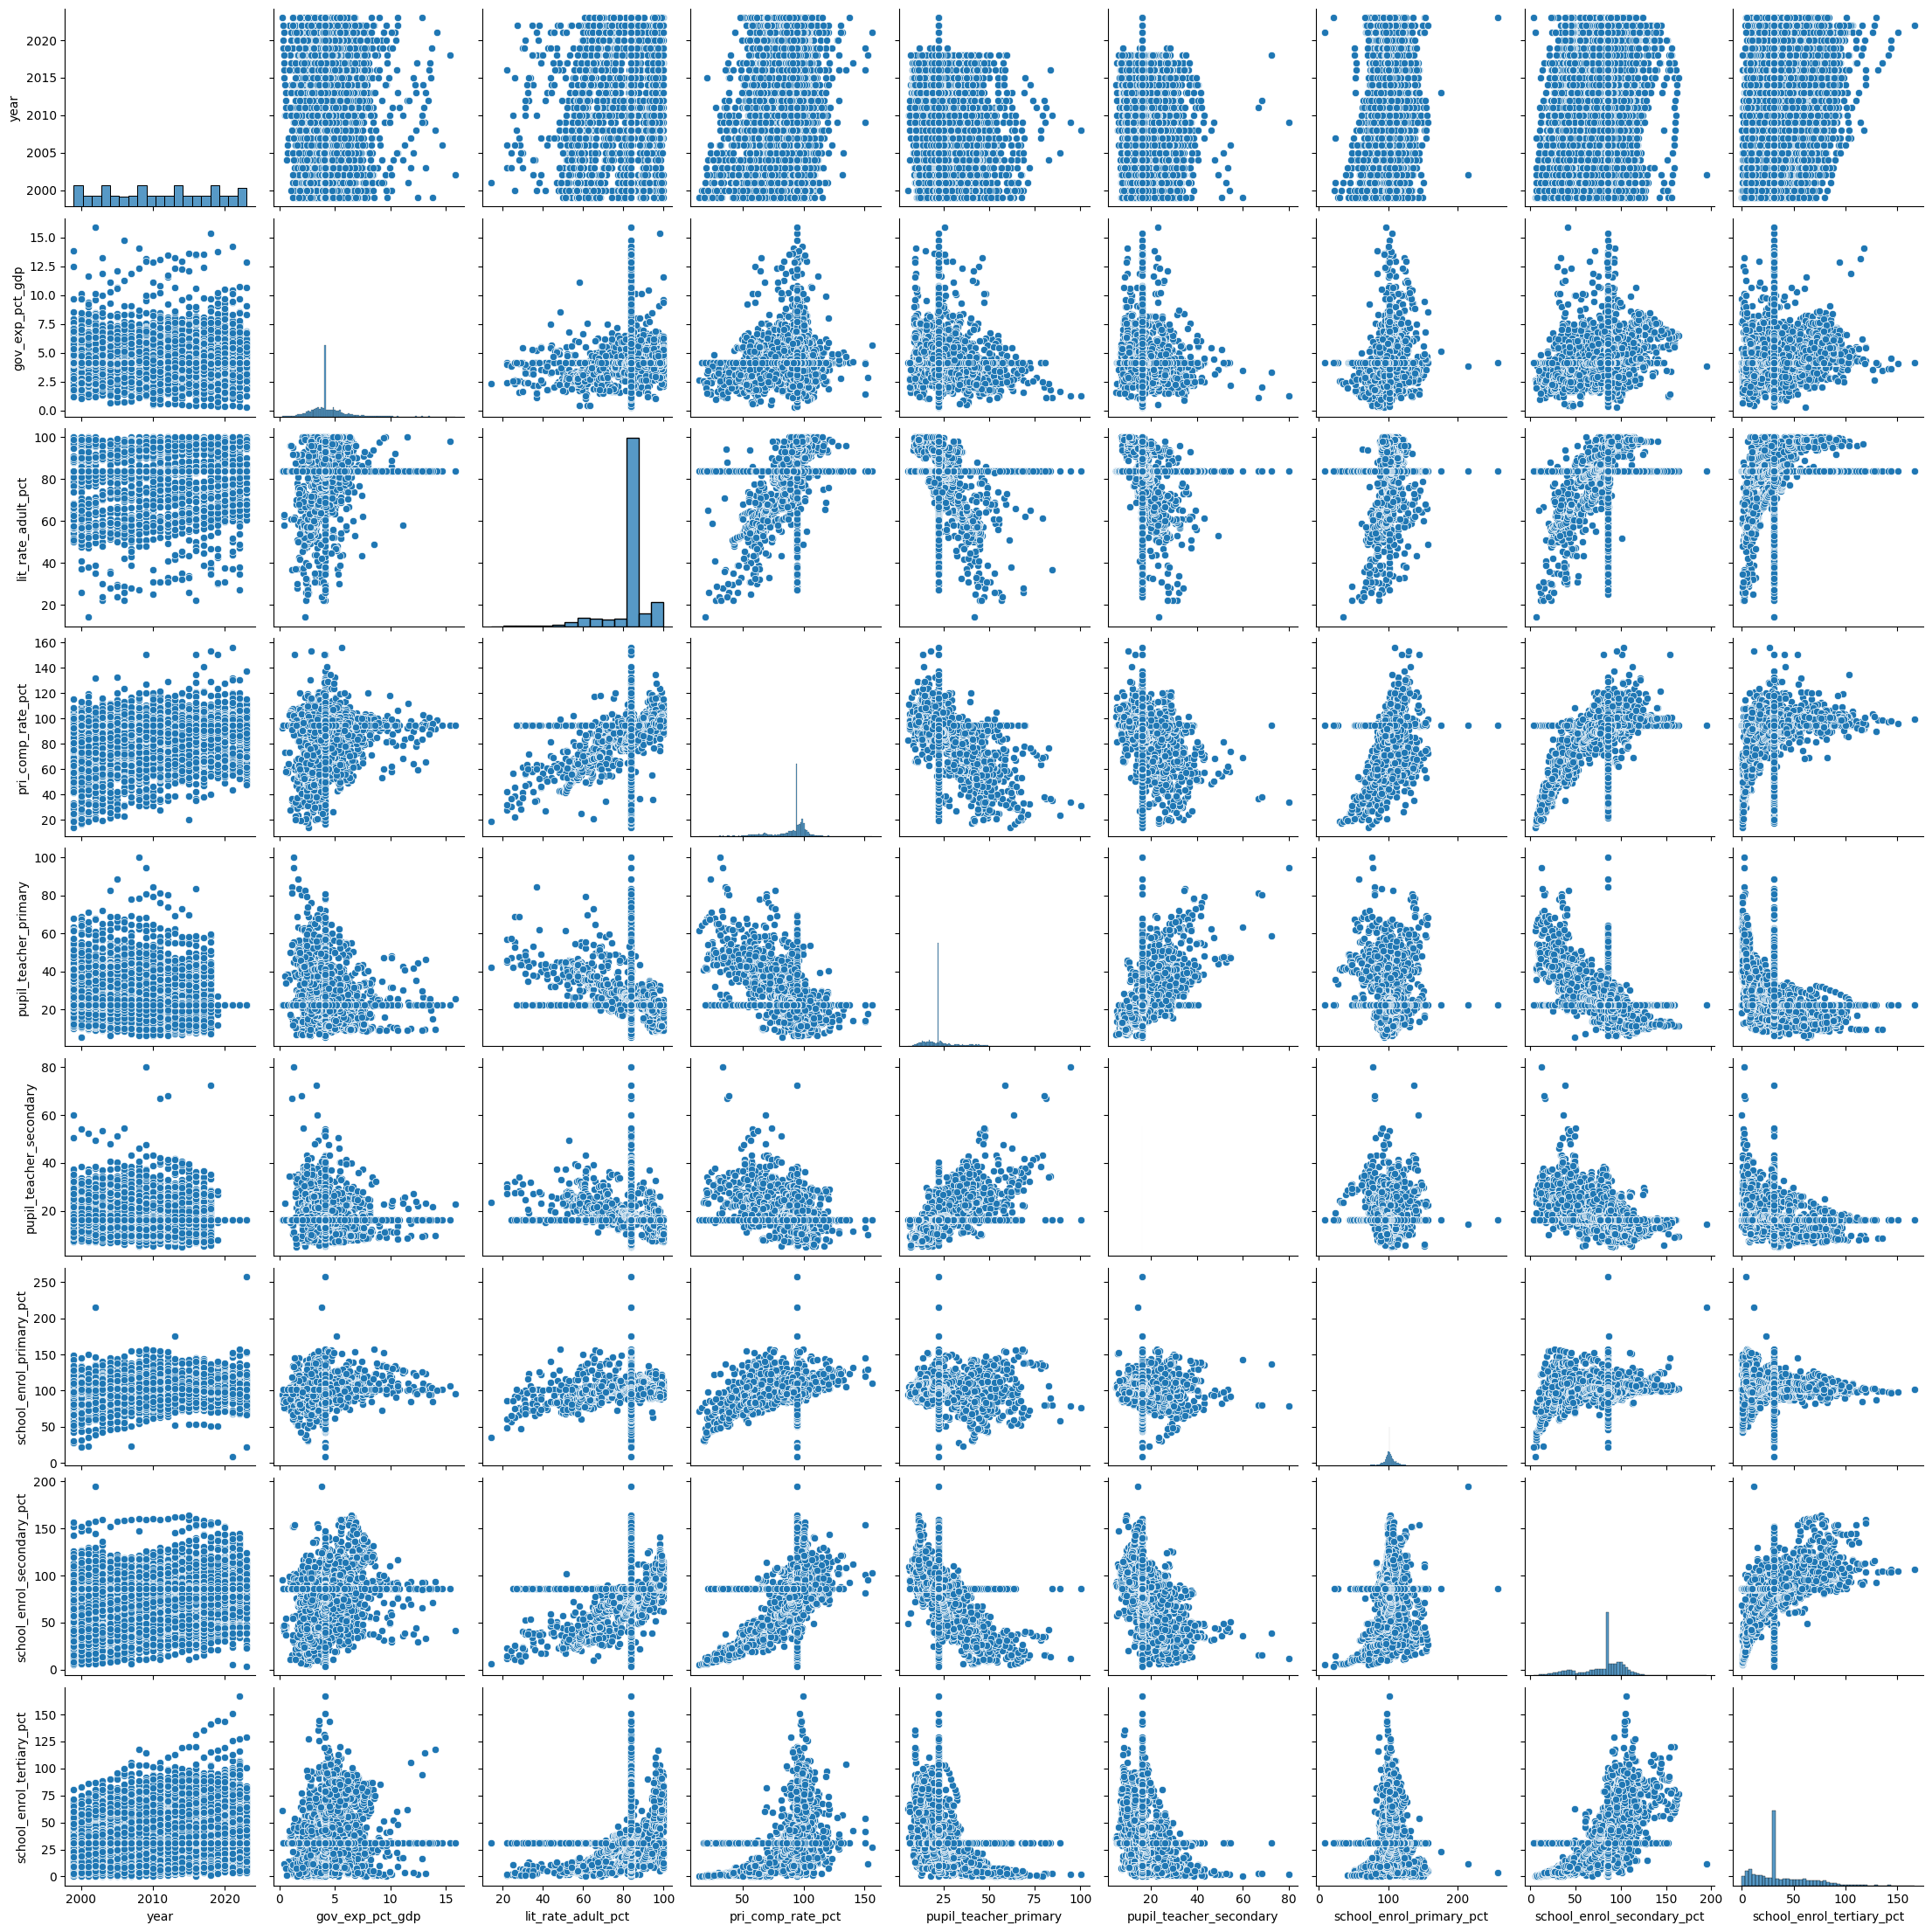

In [17]:
sns.pairplot(rt)

In [20]:
rt.drop_duplicates(inplace=True)
rt

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,4.101967,83.915154,94.604504,33.185710,16.22447,27.298849,85.707581,30.962285
1,Afghanistan,AFG,2000,4.101967,83.915154,94.604504,22.172125,16.22447,22.162991,85.707581,30.962285
2,Afghanistan,AFG,2001,4.101967,83.915154,94.604504,22.172125,16.22447,22.908590,14.471510,30.962285
3,Afghanistan,AFG,2002,4.101967,83.915154,94.604504,22.172125,16.22447,75.959747,85.707581,30.962285
4,Afghanistan,AFG,2003,4.101967,83.915154,94.604504,22.172125,16.22447,96.553680,14.078050,1.381070
...,...,...,...,...,...,...,...,...,...,...,...
5887,Zimbabwe,ZWE,2018,2.050490,83.915154,90.726250,22.172125,16.22447,97.879271,85.707581,8.425119
5888,Zimbabwe,ZWE,2019,4.101967,93.227547,90.232155,22.172125,16.22447,97.476614,85.707581,9.995644
5889,Zimbabwe,ZWE,2020,4.101967,83.915154,91.866905,22.172125,16.22447,97.384162,85.707581,9.723605
5890,Zimbabwe,ZWE,2021,4.101967,83.915154,86.099625,22.172125,16.22447,96.015148,85.707581,30.962285


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X=rt[['gov_exp_pct_gdp','pri_comp_rate_pct','pupil_teacher_primary','school_enrol_primary_pct','school_enrol_secondary_pct','school_enrol_tertiary_pct']]
y=rt[['lit_rate_adult_pct']]

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse, r2